# পিক্সেল কাউন্টিং ও হিস্টোগ্রাম প্লটিং

In [12]:
## Notebook of Topshe
%matplotlib inline
# Importing necessary librareis
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.color import rgb2gray
import matplotlib.patches as patches
import numpy as np
from PIL import Image
import math
from skimage import io, filters, draw

# Image Path
image_path = "./BengaliBMP/"
# Image count
image_count = 6000

# Plotting image inline
%matplotlib inline

# Image collection
images = [image_path + 'bn' + str(num).zfill(5) + '.bmp' for num in range(image_count)]

In [13]:
# Returns the path of all images of a given digit
def load_digit(digit, ip=image_path, ic=image_count):
    return [ip + 'bn' + str(num).zfill(5) + '.bmp' for num in range(ic) if str(num)[-1] == str(digit)]

In [14]:
import matplotlib.image as mpimg
from sklearn.datasets import load_digits

# Plots histogram of a given digit
def plot_hist(digit, index):
    from skimage.color import rgb2gray
    data = rgb2gray(mpimg.imread(load_digit(digit)[index])).ravel()
    plt.hist(data, alpha=0.5)
    plt.title("Histogram of " + str(digit) + " at index: " + str(index))
    plt.xlabel("Pixel Value")
    plt.ylabel("Count")
    plt.show()

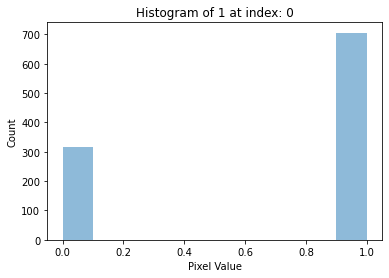

In [15]:
# Plotting histogram of digit 1 from index 0
plot_hist(1, 0)

# ১ ও ২ এর মাঝে তুলনা

দুইটা ডিজিট যদি আমি চিনতে চাই তাহলে তাদের মধ্যে এমন একটা সাধারণ বৈশিষ্ট্য থাকবে যেটার মাধ্যমে আমি আলাদা করতে পারব। যেমন হতে পারে কতগুলো কালো/সাদা পিক্সেল প্রতি ইমেজে আছে। যদি আমি দেখি যে ১ এর ক্ষেত্রে কালো পিক্সেলের সংখ্যা ২ এর তুলনায় ৫০ টা বেশি থাকে তাহলে আমি বলতে দুইটা ইমেজ তুলনা করে বলে দিতে পারব কোনটা ১ এবং কোনটা ২।

# হিস্টোগ্রাম প্লটিংয়ের মাধ্যমে তুলনা

সংখ্যাগত তুলনায় যাওয়ার আগে ভিজুয়াল কম্প্যারিজনের বিষয়টা মনে ধরল। তাই সংখ্যা ১ এর কয়েকটা স্যাম্পলের হিস্টোগ্রাম প্লট করে দেখব কোন প্যাটার্ন পাওয়া যায় কিনা।

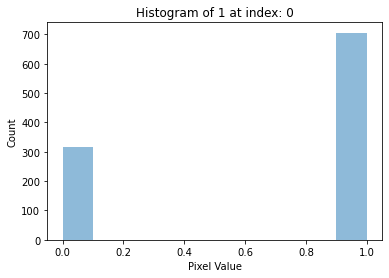

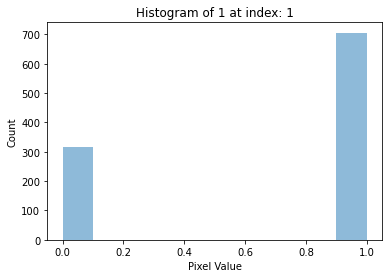

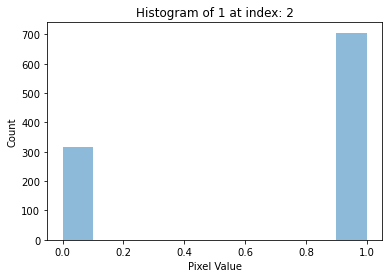

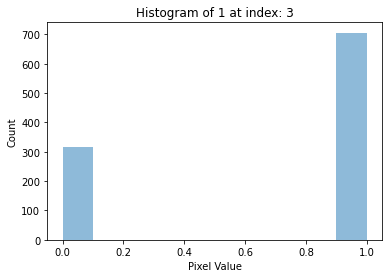

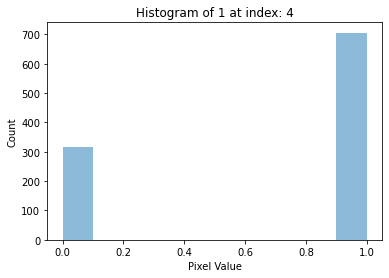

In [16]:
# Plotting histogram of five instances of digit 1
for i in range(5):
    plot_hist(1, i)

# নিউমেরিকাল ভ্যালু দিয়ে তুলনা

In [23]:
# Returns the pixel count by category
def pixel_count(digit, index):
    # Reading an image, squishing the multidimensional array into single dimension
    data = rgb2gray(mpimg.imread(load_digit(digit)[index])).ravel()
    ones =  [i for i in data if i == 1]
    zeros = [i for i in data if i == 0]
    value_dict = {
        "white_count" : len(ones),
        "black_count" : len(zeros)
    }
    return value_dict


# Comparison between two digits [applying basic statistics]
one_black_pixels = []
one_white_pixels = []

two_black_pixels = []
two_white_pixels = []

for i in range(10):
    one_black_pixels.append(pixel_count(1, i)['black_count'])
    one_white_pixels.append(pixel_count(1, i)['white_count'])
    
    two_black_pixels.append(pixel_count(2, i)['black_count'])
    two_white_pixels.append(pixel_count(2, i)['white_count'])
    
# Calculating the mean
one_black_pixel_mean = np.mean(one_black_pixels)
one_white_pixel_mean = np.mean(one_white_pixels)

two_black_pixel_mean = np.mean(two_black_pixels)
two_white_pixel_mean = np.mean(two_white_pixels)

print("1 [white] : {0}\n1 [black] : {1}".format(one_white_pixel_mean,
                                                one_black_pixel_mean
                                               ))
print(" -- ")
print("2 [white] : {0}\n2 [black] : {1}".format(two_white_pixel_mean,
                                                two_black_pixel_mean
                                               ))

1 [white] : 706.0
1 [black] : 318.0
 -- 
2 [white] : 697.0
2 [black] : 327.0


# ১ ও ২ এর পিক্সেল কাউন্ট এর পার্থক্যের বিশ্লেষণ

In [24]:
# Finding out difference between white count between 1 and 2
values = []
for i in range(10):
    values.append(abs(pixel_count(1, i)['white_count'] - pixel_count(2, i)['white_count']))
    ## If checking is needed
    #print(values[i])
    
# Maximum and minimum of the collected difference
print ("Minimum: {0}".format(np.min(values)))
print ("Maximum: {0}".format(np.max(values)))

Minimum: 9
Maximum: 9
